In [1]:
import torch
import numpy as np
from torchvision import datasets
import torchvision.transforms as transforms
from torch.utils.data import DataLoader
from torch.utils.data import random_split
import torch.nn as nn
from matplotlib import pyplot as plt
from torch import flatten
from sklearn.metrics import classification_report
import torchvision as tv
from sklearn.metrics import confusion_matrix
import seaborn as sns

In [2]:
#creating transformation to normalize data and convert it to tensor data
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.4914, 0.4822, 0.4465],std=[0.2023, 0.1994, 0.2010])
    ])

In [3]:
#downloading CIFAR 10 train and test data 
train_data = datasets.CIFAR10('data', train=True,download=True, transform=transform)
test_data = datasets.CIFAR10('data', train=False,download=True, transform=transform)

Files already downloaded and verified
Files already downloaded and verified


In [4]:
#class labels of the dataset CIFAR 10
classes = ['airplane', 'automobile', 'bird', 'cat', 'deer','dog', 'frog', 'horse', 'ship', 'truck']

In [5]:
#calculating the size of training and validation data 
SizeOfTrain = len(train_data)
SizeOfValidation = ((SizeOfTrain * 10) // 100)
SizeOfTrain = SizeOfTrain - SizeOfValidation
print(SizeOfTrain,SizeOfValidation) 

45000 5000


In [6]:
#splittng train dataset into train and validation data
train_data, validation_data = random_split(train_data, [SizeOfTrain, SizeOfValidation])

In [7]:
#loading datasets

#dataloader for trainging data
train_loader = DataLoader(train_data, batch_size=64,shuffle=True,)

#dataloader for trainging data
test_loader = DataLoader(test_data, batch_size=64,shuffle=True,)

#dataloader for validation data
val_loader = DataLoader(validation_data ,batch_size=64 ,shuffle=False,)

In [8]:
dataiter = iter(train_loader)
imgs, lbls = dataiter.next()

In [9]:
def imshow(img,lbl):
    img = img / 2 + 0.5   # unnormalize
    npimg = img.numpy()   # convert from tensor
    plt.imshow(np.transpose(npimg, (1, 2, 0))) 
    plt.title(lbl)
    plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


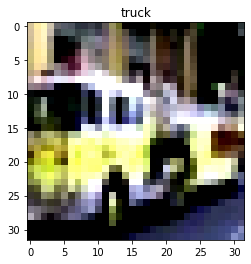

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


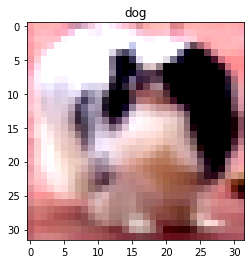

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


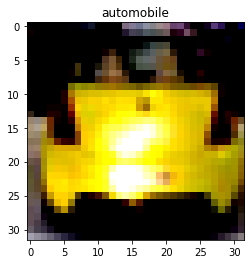

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


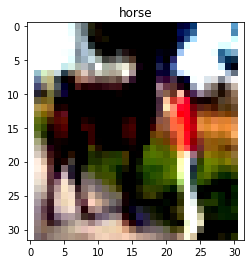

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


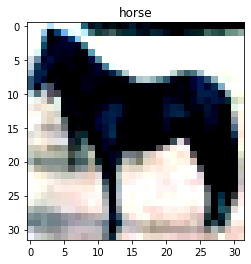

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


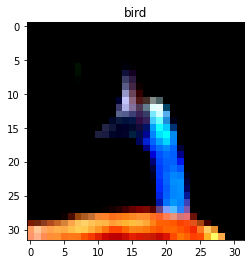

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


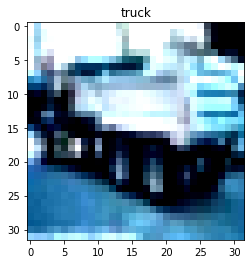

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


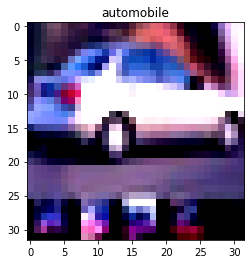

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


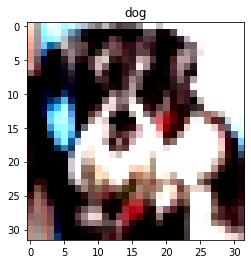

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


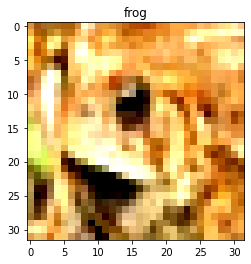

In [10]:
for i in range(10):
    n = lbls[i].numpy()
    img_lbl = classes[n]
    imshow(tv.utils.make_grid(imgs[i]),img_lbl)

In [11]:
#checking if we have gpu and running the model on gpu else on cpu
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [12]:
# Creating a CNN class
class CNN(nn.Module):
#  Determine what layers and their order in CNN object 
    def __init__(self, num_classes):
        super(CNN, self).__init__()
        self.conv1 = nn.Conv2d(in_channels=3, out_channels=32, kernel_size=3)
        self.conv2 = nn.Conv2d(in_channels=32, out_channels=32, kernel_size=3)
        self.relu1 = nn.ReLU()
        self.maxpool1 = nn.MaxPool2d(kernel_size = 2, stride = 2)
        
        self.conv3 = nn.Conv2d(in_channels=32, out_channels=64, kernel_size=3)
        self.conv4 = nn.Conv2d(in_channels=64, out_channels=64, kernel_size=3)
        self.relu2 = nn.ReLU()
        self.maxpool2 = nn.MaxPool2d(kernel_size = 2, stride = 2)
        
        self.fc1 = nn.Linear(1600, 128)
        self.relu3 = nn.ReLU()
        self.fc2 = nn.Linear(128, num_classes)
        self.logSoftmax = nn.LogSoftmax(dim=1)
    
    # moving data through the model layers   
    def forward(self, x):
        out = self.conv1(x)
        out = self.conv2(out)
        out = self.relu1(out)
        out = self.maxpool1(out)
        
        out = self.conv3(out)
        out = self.conv4(out)
        out = self.relu2(out)
        out = self.maxpool2(out)
                
        out = out.reshape(out.size(0), -1)
        
        out = self.fc1(out)
        out = self.relu3(out)
        out = self.fc2(out)
        out = self.logSoftmax(out)
        return out

In [13]:
#defining the num of calsses as 10 because CIFAR 10 has 10 classes 
num_classes = 10

In [14]:
model = CNN(num_classes)
model.to(device)

CNN(
  (conv1): Conv2d(3, 32, kernel_size=(3, 3), stride=(1, 1))
  (conv2): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1))
  (relu1): ReLU()
  (maxpool1): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv3): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1))
  (conv4): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1))
  (relu2): ReLU()
  (maxpool2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (fc1): Linear(in_features=1600, out_features=128, bias=True)
  (relu3): ReLU()
  (fc2): Linear(in_features=128, out_features=10, bias=True)
  (logSoftmax): LogSoftmax(dim=1)
)

In [15]:
#defining the batch size
batch_size = 64
#defing our learning rate 
learning_rate = 0.0005
#defining the no of epochs we need to run
num_epochs = 30
#defining loss fuction
loss_fn = nn.CrossEntropyLoss()
#defining adam optimizer
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate ,weight_decay = 0.001, momentum = 0.9)
# used for gradient scailing, prevents small gradients from vanishing or hitting 0
scaler = torch.cuda.amp.GradScaler()

In [16]:
total_epochs = [*range(30)]
train_loss_per_epoch = []
validation_loss_per_epoch = []
# Training the model
for epoch in range(num_epochs):
    print("EPOCH: {}/{}".format(epoch + 1, num_epochs))
    model.train()
    
    training_loss = 0.0
    validation_loss = 0.0
    
    val_correct = 0
    train_correct = 0
    
#Load the dataset using the train loader we defined earlier 
    for i, (images, labels) in enumerate(train_loader):  
        # convert data into tensors based on device (gpu or cpu)
        images = images.to(device)
        labels = labels.to(device)
        
        # Forward pass
        outputs = model(images)
        loss = loss_fn(outputs, labels)
        
        # Backward and optimize
        optimizer.zero_grad()
        scaler.scale(loss).backward()
        scaler.step(optimizer)
        scaler.update()
        
        training_loss += loss.item()*(len(train_loader))
        train_correct += (outputs.argmax(1) == labels).type(torch.float).sum().item()
        
    training_loss = training_loss/len(train_loader.dataset)
    train_loss_per_epoch.append(training_loss)
    train_correct = train_correct / SizeOfTrain
    print("Training loss: {:.4f}, Training accuracy: {:.4f}\n".format(training_loss, train_correct))
    
    
    with torch.no_grad():
        model.eval()
        for (img, lbl) in val_loader:
            (img, lbl) = (img.to(device), lbl.to(device))
            pred = model(img)
            validation_loss += loss_fn(pred, lbl)
            val_correct += (pred.argmax(1) == lbl).type(torch.float).sum().item()
    
    validation_loss = validation_loss / SizeOfValidation
    validation_loss_per_epoch.append(validation_loss)
    val_correct = val_correct / SizeOfValidation
    print("Validation loss: {:.4f}, Validation accuracy: {:.4f}\n".format(validation_loss, val_correct))

EPOCH: 1/30
Training loss: 24.9500, Training accuracy: 0.1639

Validation loss: 0.0335, Validation accuracy: 0.2376

EPOCH: 2/30
Training loss: 21.8009, Training accuracy: 0.2937

Validation loss: 0.0295, Validation accuracy: 0.3306

EPOCH: 3/30
Training loss: 19.4867, Training accuracy: 0.3683

Validation loss: 0.0258, Validation accuracy: 0.4078

EPOCH: 4/30
Training loss: 17.3818, Training accuracy: 0.4308

Validation loss: 0.0240, Validation accuracy: 0.4502

EPOCH: 5/30
Training loss: 16.2498, Training accuracy: 0.4696

Validation loss: 0.0225, Validation accuracy: 0.4938

EPOCH: 6/30
Training loss: 15.3999, Training accuracy: 0.4986

Validation loss: 0.0214, Validation accuracy: 0.5100

EPOCH: 7/30
Training loss: 14.6871, Training accuracy: 0.5235

Validation loss: 0.0210, Validation accuracy: 0.5190

EPOCH: 8/30
Training loss: 14.0144, Training accuracy: 0.5497

Validation loss: 0.0200, Validation accuracy: 0.5430

EPOCH: 9/30
Training loss: 13.4100, Training accuracy: 0.5722

V

In [17]:
print("Accuracy of the model is = ", val_correct * 100)

Accuracy of the model is =  71.16


In [18]:
val_array = []
for i in validation_loss_per_epoch:
    val_array.append(i.cpu().data.numpy())

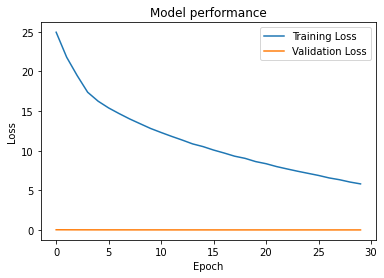

In [19]:
plt.plot(total_epochs, train_loss_per_epoch, label = "Training Loss")
plt.plot(total_epochs, val_array, label = "Validation Loss")
plt.legend()
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Model performance")
plt.show()

In [21]:
Grount_truth = []
Predicted_label = []
with torch.no_grad():
    # loop over the test set
    for (image, label) in test_loader:
        Ground_label = label.numpy()[0]
        Grount_truth.append(Ground_label)
        # send the input to the device and make predictions on it
        image = image.to(device)
        pred = model(image)
        # find the class label index with the largest corresponding probability
        pred_label = pred.argmax(axis=1).cpu().numpy()[0]
        Predicted_label.append(pred_label)

In [22]:
print(classification_report(Grount_truth,Predicted_label,target_names=classes))

              precision    recall  f1-score   support

    airplane       0.65      0.79      0.71        19
  automobile       0.71      0.71      0.71        14
        bird       0.47      0.80      0.59        10
         cat       0.38      0.46      0.41        13
        deer       0.62      0.48      0.54        21
         dog       0.75      0.46      0.57        13
        frog       0.78      0.78      0.78        18
       horse       0.75      0.67      0.71        18
        ship       0.90      0.90      0.90        20
       truck       0.89      0.73      0.80        11

    accuracy                           0.68       157
   macro avg       0.69      0.68      0.67       157
weighted avg       0.70      0.68      0.68       157



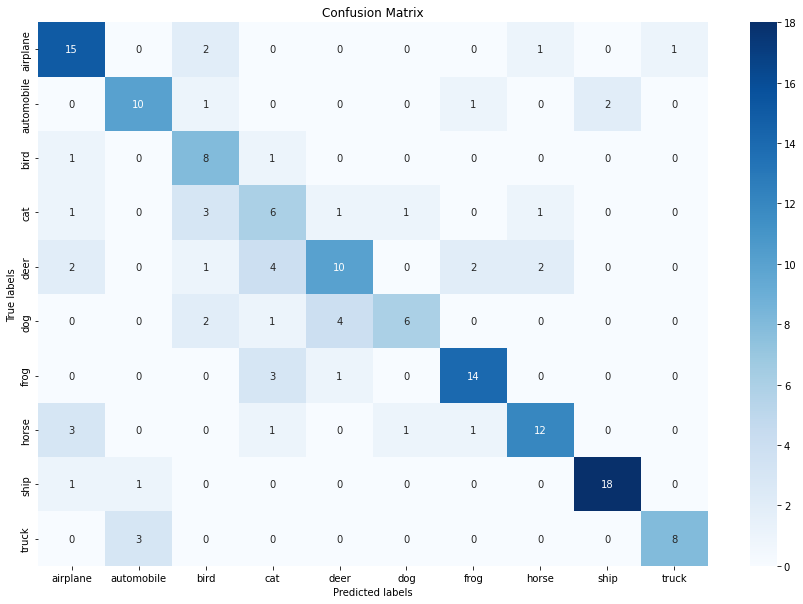

In [23]:
cm = confusion_matrix(Grount_truth,Predicted_label)
fig , ax= plt.subplots(figsize=(15, 10))
sns.heatmap(cm, cmap=plt.cm.Blues,annot = True,ax=ax)
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(classes)
ax.yaxis.set_ticklabels(classes)
plt.show()